# Salaries in Science


#### Kayla Wen, Colin Chen, Paria Sokhanran, Justin Leung 

## Part I: Introduction
The decision of what to study in university is an undeniable challenge many students encounter. Most students value stability; therefore, they aim to complete their degree and obtain a well-paying job post-graduation. Our group is interested in investigating the correlation between compensation and employment rates of various industries. Therefore, we aim to answer the following question: What is the relationship between salaries and employment rates? This question stemmed from our hypothesis that industries with higher salaries have lower employment rates due to their lack of funding for more employees. To accomplish this, we will use a data set taken from Kaggle, which includes multiple files with information about individuals’ majors, grades, career prospects, and other personal information such as age. 

## Part II: Preliminary Exploratory Data Analysis

In [1]:
#Run this cell first

library(tidyverse)
library(testthat)
library(digest)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 15)


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘testthat’


The following object is masked from ‘package:dplyr’:

    matches


The following object is masked from ‘package:purrr’:

    is_null


The following objects are masked from ‘package:readr’:

    edition_get, local_edition


The following object is masked from ‘package:tidyr’:

    matches


── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0  

#### Reading the Data Set and Splitting Up

In [2]:
## reads the data of the average salary of graduates with a certain degree and major
## and add in a column for employment rate by taking the opposite of the umemployment rate
data <- read_csv(file = "https://raw.githubusercontent.com/colin-c/Salaries-in-Science/main/data/all-ages.csv") |>
    mutate(Employment_rate = 1 - Unemployment_rate) 

head(data)
tail(data)

## split the data set into three sets, according to the different percentiles in use (25th, 50th (median), 75th)
## p25th_data
## p50th_data
## p75th_data

p25th_data <- data |>
    select(Employment_rate, P25th)
head(p25th_data)
tail(p25th_data)

p50th_data <- data |>
    select(Employment_rate, Median)
head(p50th_data)
tail(p50th_data)

p75th_data <- data |>
    select(Employment_rate, P75th)
head(p75th_data)
tail(p75th_data)

Rows: 173 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): Major, Major_category
dbl (10): index, Major_code, Total, Employed, Employed_full_time_year_round,...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


index,Major_code,Major,Major_category,Total,Employed,Employed_full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,Employment_rate
<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,1100,GENERAL AGRICULTURE,Agriculture & Natural Resources,128148,90245,74078,2423,0.02614711,50000,34000,80000,0.9738529
1,1101,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,95326,76865,64240,2266,0.02863606,54000,36000,80000,0.9713639
2,1102,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources,33955,26321,22810,821,0.03024832,63000,40000,98000,0.9697517
3,1103,ANIMAL SCIENCES,Agriculture & Natural Resources,103549,81177,64937,3619,0.04267890,46000,30000,72000,0.9573211
4,1104,FOOD SCIENCE,Agriculture & Natural Resources,24280,17281,12722,894,0.04918845,62000,38500,90000,0.9508116
5,1105,PLANT SCIENCE AND AGRONOMY,Agriculture & Natural Resources,79409,63043,51077,2070,0.03179089,50000,35000,75000,0.9682091


index,Major_code,Major,Major_category,Total,Employed,Employed_full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,Employment_rate
<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
167,6210,INTERNATIONAL BUSINESS,Business,86064,66453,51012,5106,0.07135371,54000,38600,80000,0.9286463
168,6211,HOSPITALITY MANAGEMENT,Business,200854,163393,122499,8862,0.05144698,49000,33000,70000,0.9485530
169,6212,MANAGEMENT INFORMATION SYSTEMS AND STATISTICS,Business,156673,134478,118249,6186,0.04397714,72000,50000,100000,0.9560229
170,6299,MISCELLANEOUS BUSINESS & MEDICAL ADMINISTRATION,Business,102753,77471,61603,4308,0.05267856,53000,36000,83000,0.9473214
171,6402,HISTORY,Humanities & Liberal Arts,712509,478416,354163,33725,0.06585101,50000,35000,80000,0.9341490
172,6403,UNITED STATES HISTORY,Humanities & Liberal Arts,17746,11887,8204,943,0.07349961,50000,39000,81000,0.9265004


Employment_rate,P25th
<dbl>,<dbl>
0.9738529,34000
0.9713639,36000
0.9697517,40000
0.9573211,30000
0.9508116,38500
0.9682091,35000


Employment_rate,P25th
<dbl>,<dbl>
0.9286463,38600
0.9485530,33000
0.9560229,50000
0.9473214,36000
0.9341490,35000
0.9265004,39000


Employment_rate,Median
<dbl>,<dbl>
0.9738529,50000
0.9713639,54000
0.9697517,63000
0.9573211,46000
0.9508116,62000
0.9682091,50000


Employment_rate,Median
<dbl>,<dbl>
0.9286463,54000
0.9485530,49000
0.9560229,72000
0.9473214,53000
0.9341490,50000
0.9265004,50000


Employment_rate,P75th
<dbl>,<dbl>
0.9738529,80000
0.9713639,80000
0.9697517,98000
0.9573211,72000
0.9508116,90000
0.9682091,75000


Employment_rate,P75th
<dbl>,<dbl>
0.9286463,80000
0.9485530,70000
0.9560229,100000
0.9473214,83000
0.9341490,80000
0.9265004,81000


#### Plot each scatter plot relating to the different salary percentiles

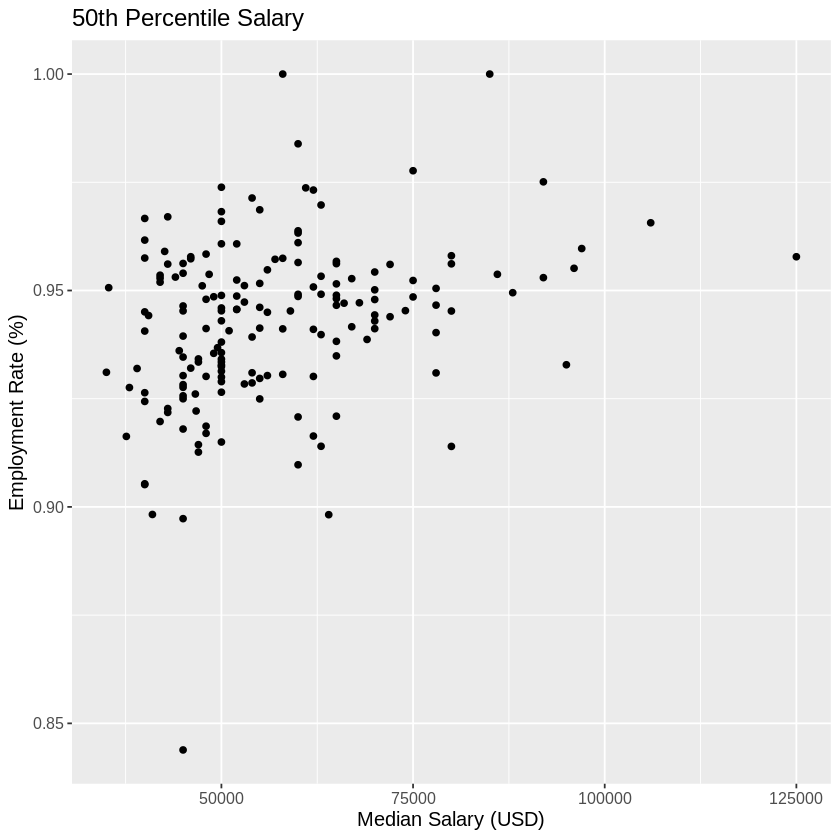

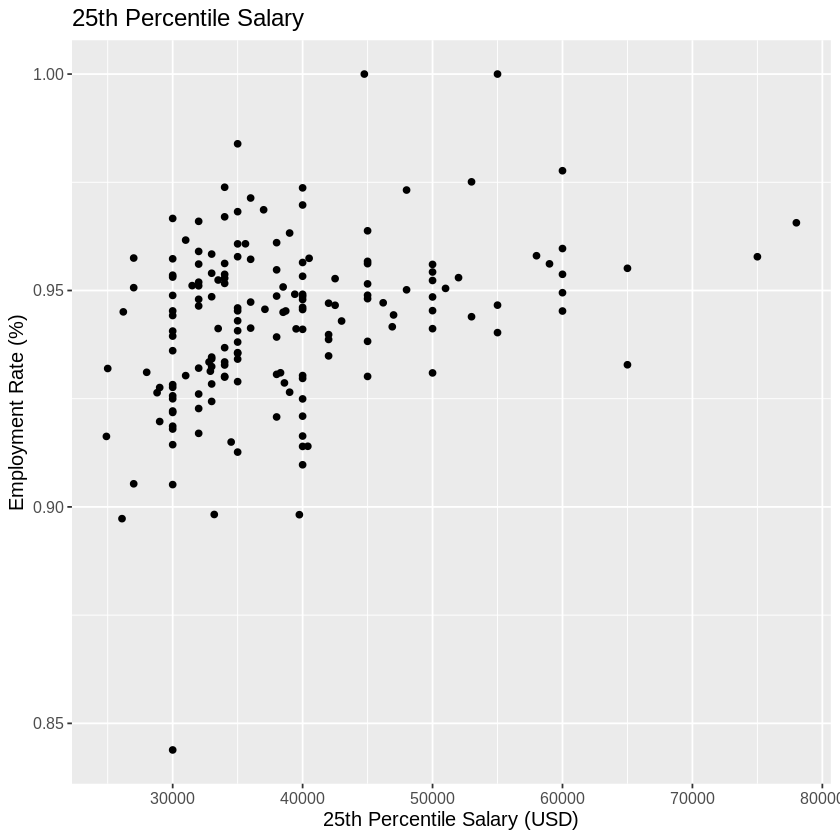

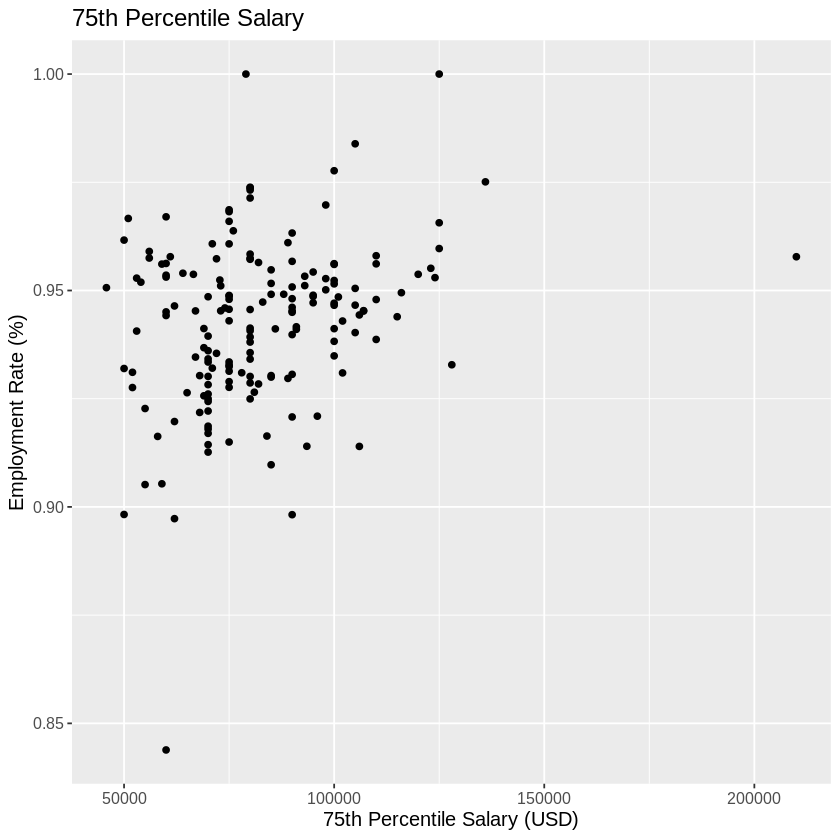

In [3]:
## Before the classifiction, creating a visualizing of the data where
## the predictor variable, Salary is on the x-axis and the response
## variable, Employment Rate is on the y-axis

p50th_plot <- p50th_data |>
    ggplot(aes(x = Median, y = Employment_rate)) +
    geom_point() +
    labs(x = "Median Salary (USD)", y = "Employment Rate (%)") +
    ggtitle("50th Percentile Salary") +
    theme(text = element_text(size=12))
p50th_plot 

p25th_plot <- p25th_data |>
    ggplot(aes(x = P25th, y = Employment_rate)) +
    geom_point() +
    labs(x = "25th Percentile Salary (USD)", y = "Employment Rate (%)") +
    ggtitle("25th Percentile Salary") +
    theme(text = element_text(size=12))
p25th_plot

p75th_plot <- p75th_data |>
    ggplot(aes(x = P75th, y = Employment_rate)) +
    geom_point() +
    labs(x = "75th Percentile Salary (USD)", y = "Employment Rate (%)") +
    ggtitle("75th Percentile Salary") +
    theme(text = element_text(size=12))
p75th_plot 

## 25th Percentile Salary Data

In [5]:
## splits data into training and testing
set.seed(38)

p25th_data_split <- initial_split(p25th_data, prop = 0.75, strata = NULL)
p25th_data_training <- training(p25th_data_split)
p25th_data_testing <- testing(p25th_data_split)

head(p25th_data_training)

Employment_rate,P25th
<dbl>,<dbl>
0.9367834,34000
0.9494912,60000
0.9412075,33500
0.9449671,38500
0.9243689,33000
0.9162862,24900


In [8]:
# Using cross-validation to choose K

p25th_recipe <- recipe(Employment_rate ~ P25th, data = p25th_data_training) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())

p25th_spec <- nearest_neighbor(weight_func = "rectangular", 
                                      neighbors = tune()) |>
                        set_engine("kknn") |>
                        set_mode("regression")

p25th_vfold <- vfold_cv(p25th_data_training, v = 5, strata = Employment_rate)

p25th_wkflw <- workflow() |>
  add_recipe(p25th_recipe) |>
  add_model(p25th_spec)

p25th_wkflw

══ Workflow ════════════════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────
K-Nearest Neighbor Model Specification (regression)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


In [10]:
## Cross-validation for a grid of numbers of neights from 1-101 to find
## the value of K that minimizes RMSPE
gridvals <- tibble(neighbors = seq(1,101))

p25th_results <- p25th_wkflw |>
  tune_grid(resamples = p25th_vfold, grid = gridvals) |>
  collect_metrics() |>
  filter(.metric == "rmse")

## show the results
p25th_results

! Fold1: preprocessor 1/1, model 1/1: 101 samples were requested but there were 101 rows in the data. 96 will ...

! Fold2: preprocessor 1/1, model 1/1: 101 samples were requested but there were 101 rows in the data. 96 will ...

! Fold3: preprocessor 1/1, model 1/1: 101 samples were requested but there were 104 rows in the data. 99 will ...

! Fold4: preprocessor 1/1, model 1/1: 101 samples were requested but there were 105 rows in the data. 100 will...

! Fold5: preprocessor 1/1, model 1/1: 101 samples were requested but there were 105 rows in the data. 100 will...



neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,rmse,standard,0.02279571,5,0.0015898903,Preprocessor1_Model001
2,rmse,standard,0.01855573,5,0.0013240116,Preprocessor1_Model002
3,rmse,standard,0.01827059,5,0.0013922888,Preprocessor1_Model003
4,rmse,standard,0.01790188,5,0.0009908979,Preprocessor1_Model004
5,rmse,standard,0.01787894,5,0.0008674281,Preprocessor1_Model005
6,rmse,standard,0.01757721,5,0.0008837169,Preprocessor1_Model006
7,rmse,standard,0.01745423,5,0.0010690693,Preprocessor1_Model007
8,rmse,standard,0.01743608,5,0.0009366920,Preprocessor1_Model008
⋮,⋮,⋮,⋮,⋮,⋮,⋮


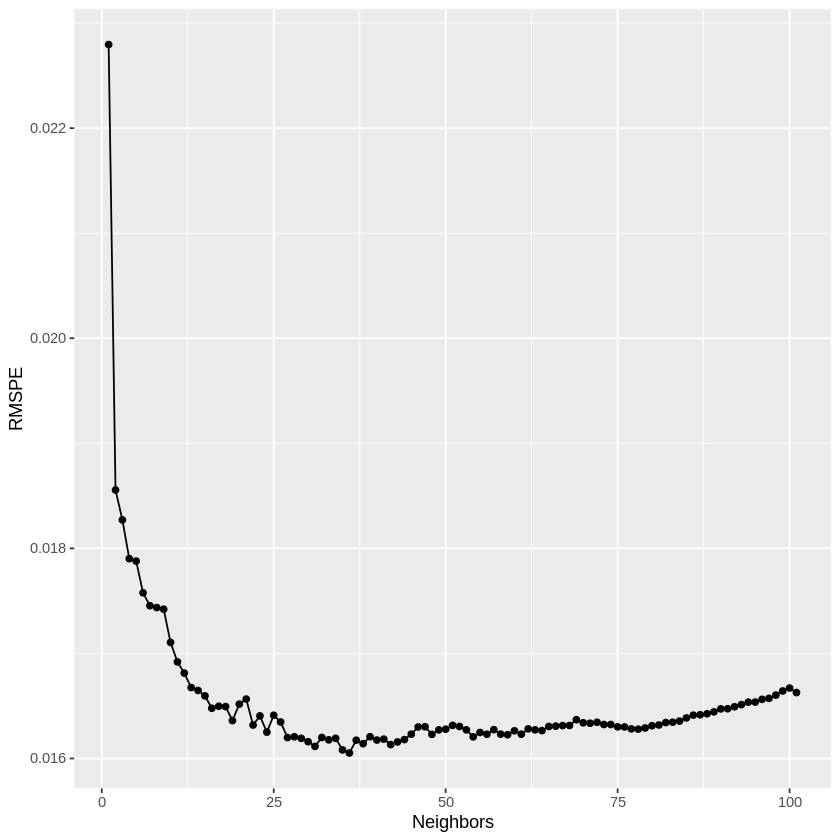

In [11]:
#Here is a vizualization of the RMSPE values for the different K values. 

p25th_RMSPE_plot <- ggplot(p25th_results, aes(x = neighbors, y = mean)) +
    geom_point() +
    geom_line() +
    xlab("Neighbors") +
    ylab("RMSPE")

p25th_RMSPE_plot

In [13]:
## This will only show the row of minimum RMSPE which is the K value we want
## to use for the analysis

p25th_min <- p25th_results |>
  filter(mean == min(mean))

## K value chosen is 36
p25th_min

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
36,rmse,standard,0.01605211,5,0.0007558967,Preprocessor1_Model036


In [17]:
#In order to use our model on the testing data, we need to retrain
#the KNN regression model on the training data set using the K value
#we found in the earlier step that minimizes RMSPE

k_value <- p25th_min |> 
    pull(neighbors)

p25th_spec_test <- nearest_neighbor(weight_func = "rectangular", neighbors = k_value) |>
    set_engine("kknn") |>
    set_mode("regression")

p25th_fit_test <- workflow() |>
    add_recipe(p25th_recipe) |>
    add_model(p25th_spec_test) |>
    fit(data = p25th_data_training)

p25th_summary_test <- p25th_fit_test |>
  predict(p25th_data_testing) |>
  bind_cols(p25th_data_testing) |>
  metrics(truth = Employment_rate, estimate = .pred) |>
  filter(.metric == 'rmse')

p25th_summary_test

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,0.02360555


In [ ]:
#Now we can assess our model and the RMSPE and how well it predicts using 
#the testing data we set aside earlier. 

p25th_preds <- tibble(Average_Income = seq(from = 500, to = 125000, by = 10))

p25th_preds <- p25th_fit_test |>
  predict(p25th_preds) |>
  bind_cols(p25th_preds)

p25th_final <- ggplot(Conservative_training, aes(x = Average_Income, y = Percentage_of_Population_Voted)) +
  geom_point(alpha = 0.4) +
  geom_line(data = Conservative_preds, 
            mapping = aes(x = Average_Income, y = .pred), 
            color = "blue") +
  xlab("Average Income per person of the District") +
  ylab("Percentage of Population who voted Conservative") +
  ggtitle(paste0("Conservative plot, K = ", kmin)) + 
  theme(text = element_text(size = 12))+
  xlim(0,120000)+
  ylim(0,100)

p25th_final

## Part III: Methods
We will conduct our data analysis using the techniques and functions from the worksheets and tutorial sets and expect much of our coding to be based on the content we have learned throughout the course. We are using a dataset from Kaggle, which we intend to mainly use the information from the columns “Major”, “Median”, “P25th”, and “P75th”. To visualize our findings, we will be creating 3 scatter plots. For each of the plots, the y-axis will be labeled “Employment Rate”, representing the percentage of graduates employed in each of the majors, and the x-axis will be labeled “Median Salary (USD)”, “25th Percentile Salary (USD)”, and “75th Percentile Salary (USD)”. Including the data from the columns “P25th” and “P75th” will enable us to provide a more comprehensive perspective on the relationship between the salary of each graduated major and their respective employment rate. Through the use of regression techniques, we can determine any existing significance that exists between salaries and employment rates and gain further insight into their relationship. Additionally, we will use cross-validation to determine the most appropriate K neighbors value and to improve the accuracy of our model. 


## Part IV: Expected Outcomes and Significance

Our analysis aims to investigate the relationship between salary and employment rate, anticipating that higher-paying jobs may exhibit lower employment rates. We hypothesize that the availability of higher-paying positions within a particular field could be limited, leading to a lower overall employment rate. This expectation is based on the premise that higher salary levels often correspond to positions requiring specialized skills or qualifications, resulting in a more competitive job market. Job seekers would also tend to apply for these higher-paying careers, resulting in highly competitive applications and leaving many unemployed. Companies that supply such a high salary may also be unable to open up a large quantity of the position leading to increased selectivity in their hiring process. By examining the correlation between salary and employment rate, we seek to uncover valuable insights into the dynamics of job opportunities and their relationship to compensation levels. Understanding this relationship holds significant implications for individuals pursuing their education and seeking career paths with optimal employment prospects. As for the future outlook, recognizing the correlation between salary and employment rate can help students make informed decisions about their majors and field of study alongside their passions.



### Citiation

College majors and their graduates. Kaggle. (n.d.). https://www.kaggle.com/datasets/thedevastator/uncovering-insights-to-college-majors-and-their?resource=download&amp;select=all-ages.csv 